In [2]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [4]:
df_wv = predictions("waves_price.csv")
df_wv.data = df_wv.data.reindex(index=df_wv.data.index[::-1])

                Open  High       Low     Close  Volume Market Cap      Mean
2016-06-02  1.330000  1.39  1.150000  1.210000  83,734          -  1.270000
2016-06-03  1.290000  1.66  0.727579  1.090000  57,721          -  1.191895
2016-06-04  1.090000  1.29  0.575898  0.586993   4,912          -  0.885723
2016-06-05  0.587588  1.11  0.580745  0.713006  41,700          -  0.747835
2016-06-06  0.712541  1.17  0.712541  0.768672  95,573          -  0.840939
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629 entries, 2016-06-02 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          629 non-null float64
High          629 non-null float64
Low           629 non-null float64
Close         629 non-null float64
Volume        629 non-null object
Market Cap    629 non-null object
Mean          629 non-null float64
dtypes: float64(5), object(2)
memory usage: 39.3+ KB
None
------------------------------------------------

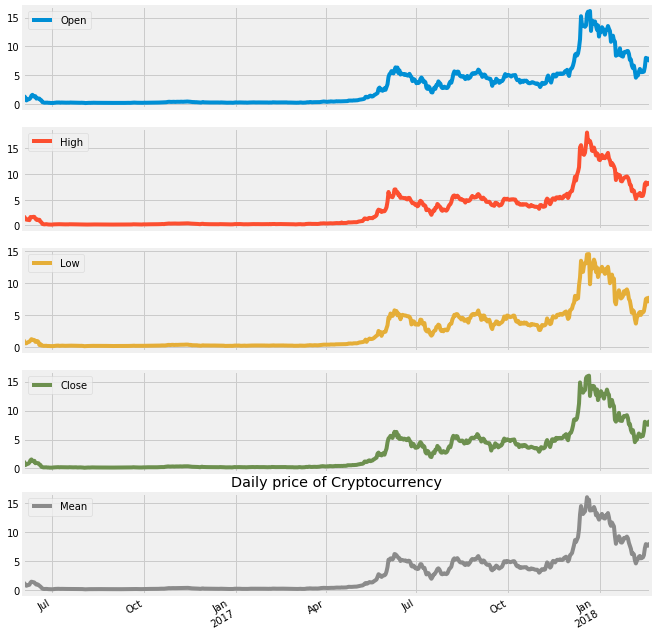

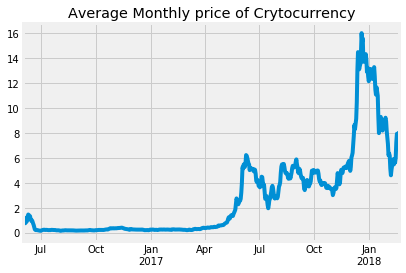

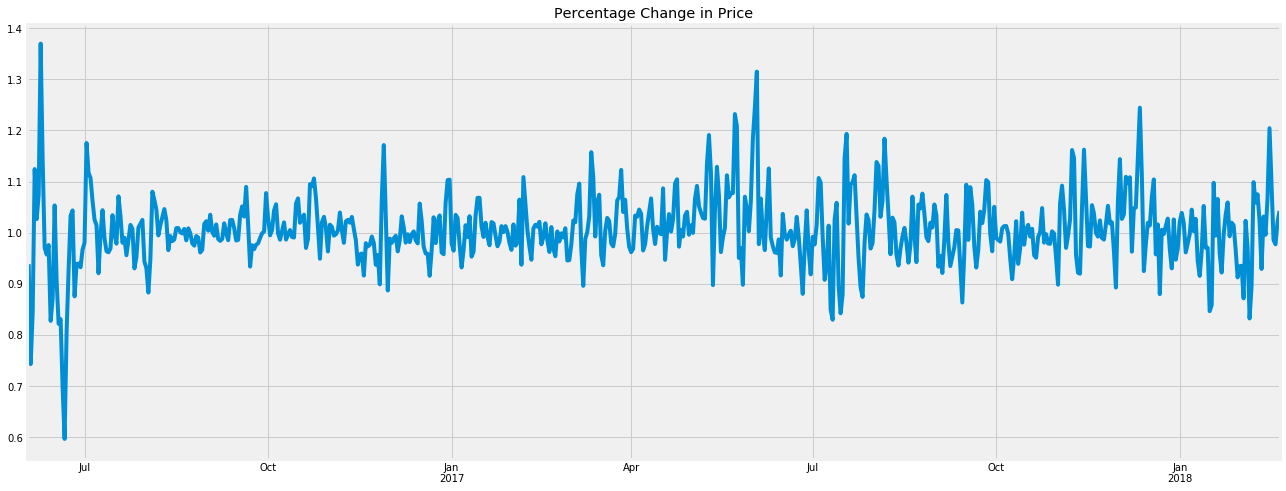

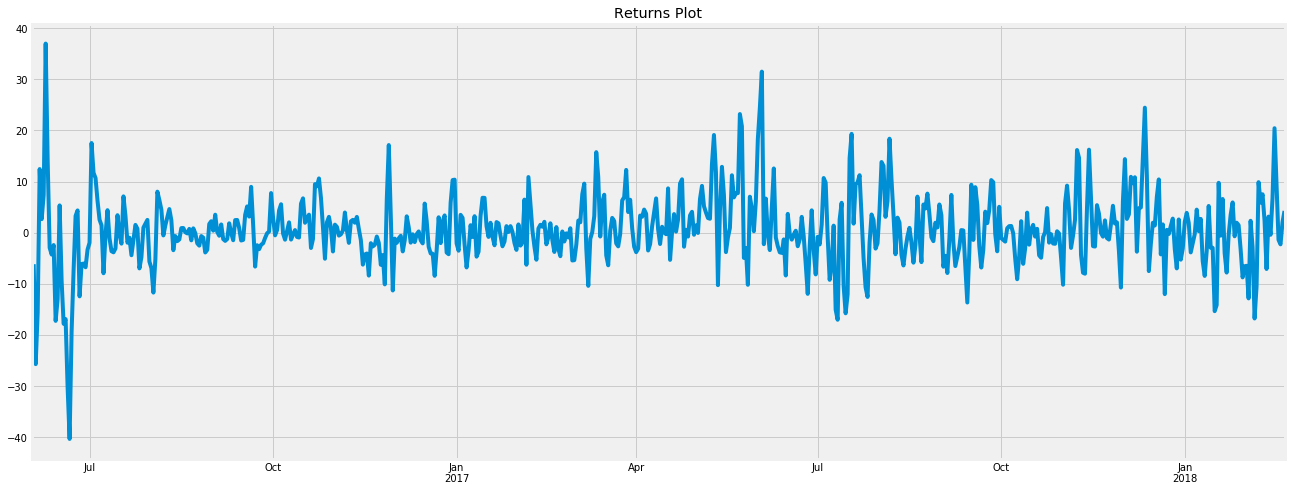

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


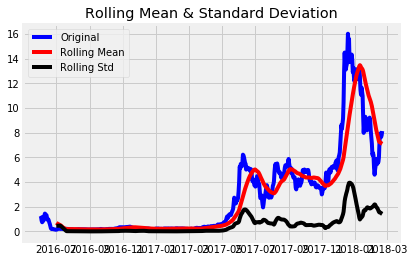

Results of Dickey-Fuller Test
Test Statistic                  -1.835048
p-value                          0.363205
#Lags Used                      20.000000
Number of Observations Used    608.000000
Critical Value(1%)              -3.441151
Critical Value(5%)              -2.866305
Critical Value(10%)             -2.569308
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            2.141238
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.254
P-value                         0.650
Lags                               20
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [5]:
df_wv.description()
df_wv.missing()
df_wv.plot_daily()
df_wv.plot_monthly()
df_wv.Percent_change()
df_wv.Returns()
df_wv.stationarity_test()

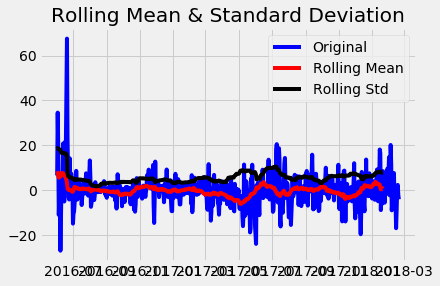

Results of Dickey-Fuller Test
Test Statistic                  -4.150524
p-value                          0.000798
#Lags Used                      16.000000
Number of Observations Used    611.000000
Critical Value(1%)              -3.441098
Critical Value(5%)              -2.866282
Critical Value(10%)             -2.569295
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.318162
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [5]:
from Model import *
wv_ret = model(df_wv.data)
wv_ret.stationarity_test()

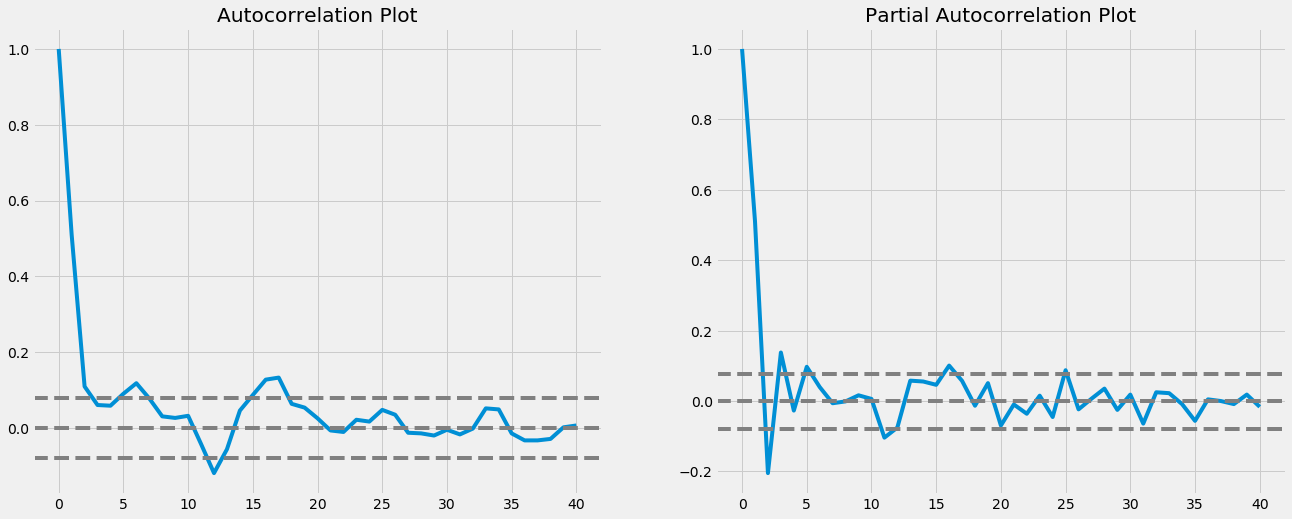

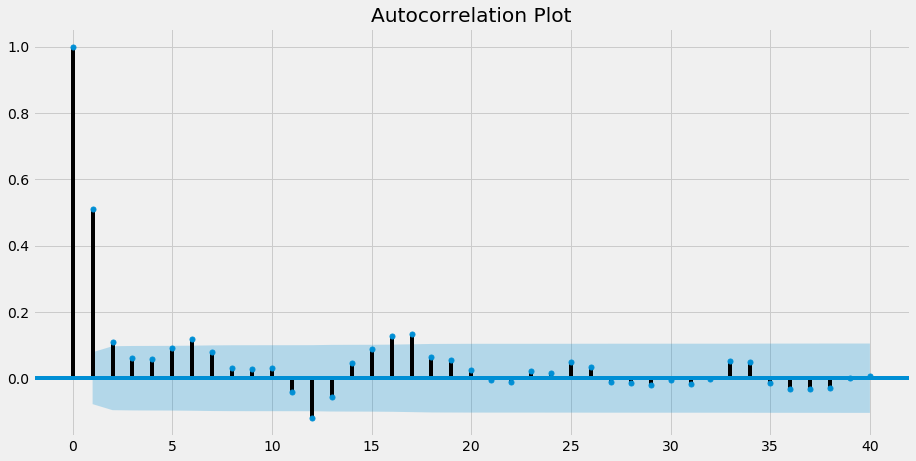

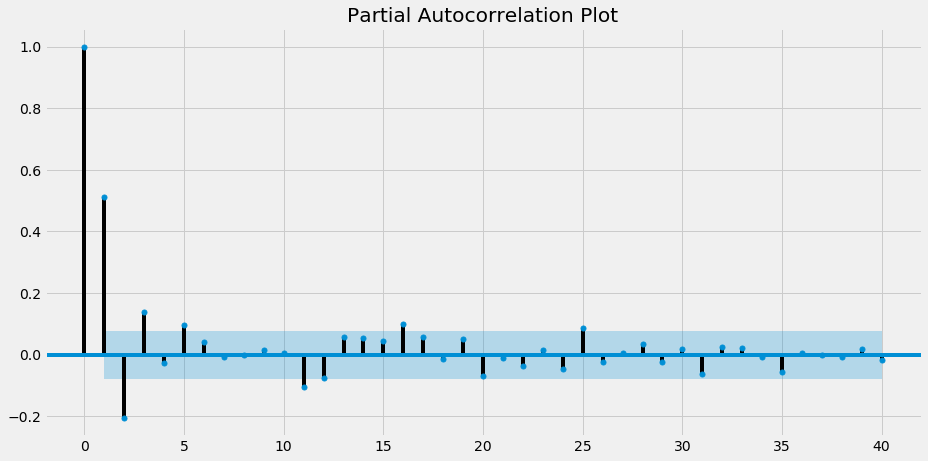

In [6]:
wv_ret.lags()
wv_ret.auto_graphics()
wv_ret.partial_graphics()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Results: ARMA
Model:              ARMA             BIC:                 4060.8484 
Dependent Variable: Returns          Log-Likelihood:      -2017.5   
Date:               2019-10-18 18:12 Scale:               1.0000    
No. Observations:   628              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       625                                   06-02-2016
Converged:          1.0000           S.D. of innovations: 6.010     
No. Iterations:     11.0000          HQIC:                4049.982  
AIC:                4043.0782                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const             -0.0589    0.4277  -0.1378  0.8904  -0.8972  0.7793
ar.L1.Returns      0.1675    0.0658   2.5475  0.0111   0.0

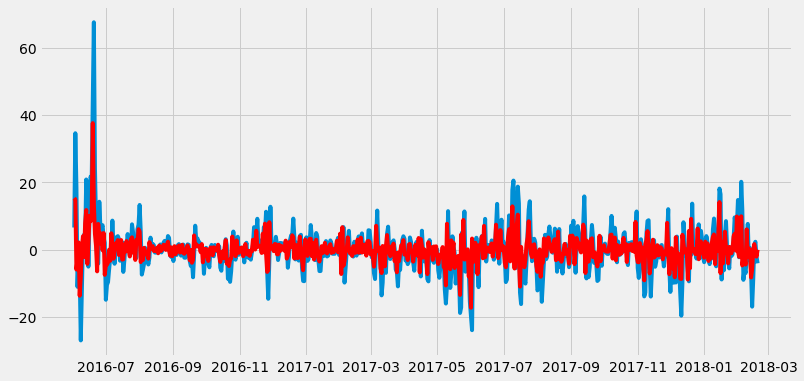

In [7]:
wv_ret.ARIMA_model(1,1)
wv_ret.plot_predict()

In [7]:
df_wv.data = df_wv.data['2017-01-01':]

In [8]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
wv_sarima = produce_predict(df_wv.data)

In [9]:
wv_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:2593.534337279003
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:2192.339920902731
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:1983.3007399609314
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:1816.3009733090541
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:1977.1624660913676
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:1886.1425559569145
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:1838.9008258521044
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:1818.3003719714013
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:2046.9867026884099
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:1698.3246060127676
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:1510.4553926366652
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:1371.9014385584105
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:1504.315691780553
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:1412.2215543677955
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:1399.0441291541697
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:1373.901770236416
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:343.581429936139
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:340.07318699152523
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 30) - AIC:338.56830284616075
ARIMA(0, 1, 0)x(1, 0, 1, 30) - AIC:340.6549613891831
ARIMA(0, 1, 0)x(1, 1, 0, 30) - AIC:473.3055129868848
ARIMA(0, 1, 0)x(1, 1, 1, 30) - AIC:392.03881447036656
ARIMA(0, 1, 1)x(0, 0, 0, 30) - AIC:286.9151428713035
ARIMA(0, 1, 1)x(0, 0, 1, 30) - AIC:293.1097038951524
ARIMA(0, 1, 1)x(0, 1, 0, 30) - AIC:576.6843512428986
ARIMA(0, 1, 1)x(0, 1, 1, 30) - AIC:341.47887302661536
ARIMA(0, 1, 1)x(1, 0, 0, 30) - AIC:292.11774383403025
ARIMA(0, 1, 1)x(1, 0, 1, 30) - AIC:294.4807388222588
ARIMA(0, 1, 1)x(1, 1, 0, 30) - AIC:421.9362020285238
ARIMA(0, 1, 1)x(1, 1, 1, 30) - AIC:345.7366251083928
ARIMA(1, 0, 0)x(0, 0, 0, 30) - AIC:345.3879563346663


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:353.6181158315238
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:646.6944324568749
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:393.78661782258735
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:340.3801973580869
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:342.35074449839186
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:474.2150366539082


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:479.38040687060965
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:288.68162759261696


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:301.1121718046602
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:574.2476508154432


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:342.48160534790634


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:294.1177392027259
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:296.34372255303447
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:421.51026816849674


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:428.8873870604787
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:290.0867655650602
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:295.0687015988302
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:584.5228999616484
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:343.6508239385714
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:294.28700699641837
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:296.24288062948443
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:423.6238982853986
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:346.48677791962467
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:287.36046861214555
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:293.7794645312093
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:575.9758354128949
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:341.5043064607672
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:292.9807950304815
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:295.1574348509682
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:421.7709627724558
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:345.6382464281718


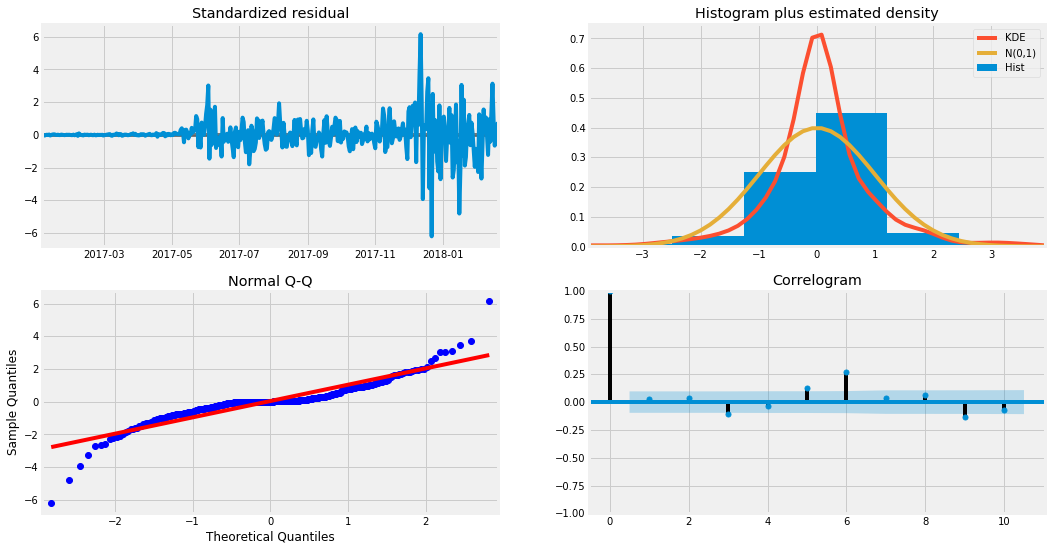

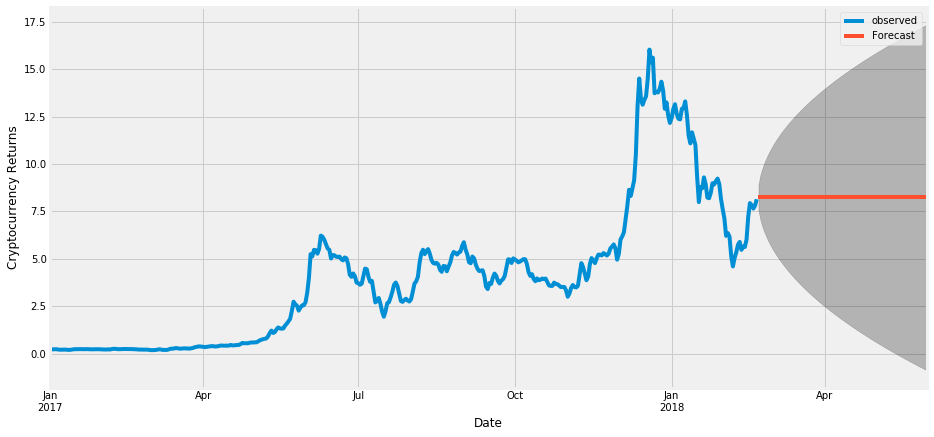

In [10]:
wv_sarima.sarima_model((0,1,1),(0,0,0,30))
wv_sarima.diagnostics()
wv_sarima.produce_forecast()

In [11]:
from fbprophet import Prophet
from prophet_model import *
wv_pro = prophet_model("waves_price.csv",113)

<Figure size 1296x432 with 0 Axes>

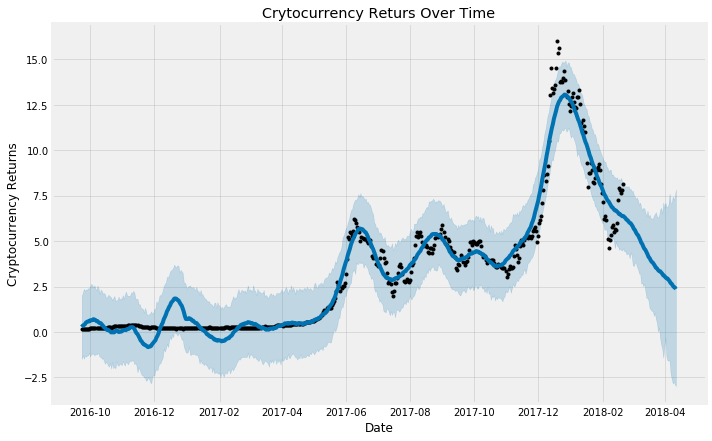

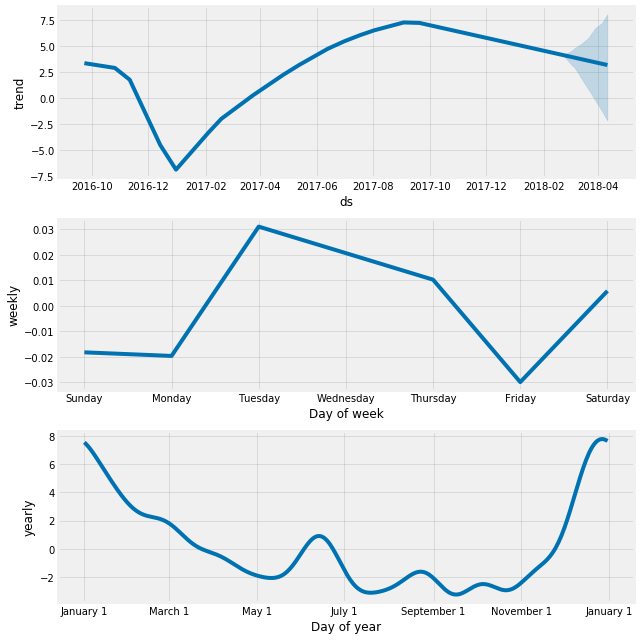

In [12]:
wv_pro.model()
wv_pro.forecast()
wv_pro.Vizualization()